In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
# loading our dataframes
#we will be using df_m for our sample of math class studetns and df_p for our sameple of portugees class. 

df_m = pd.read_csv('../data/student-mat.csv', delimiter=';')
df_p = pd.read_csv('../data/student-por.csv', delimiter=';')

In [3]:
#shape of our DFs 
print("Our MAth class have (ROWS, Columns):", df_m.shape)
print(" ")
print("Our Port class have (ROWS, Columns):", df_p.shape)

Our MAth class have (ROWS, Columns): (395, 33)
 
Our Port class have (ROWS, Columns): (649, 33)


BEFORE CLEANING Boxplot visualization of Math Class studdetns: Axes(0.125,0.11;0.775x0.77)


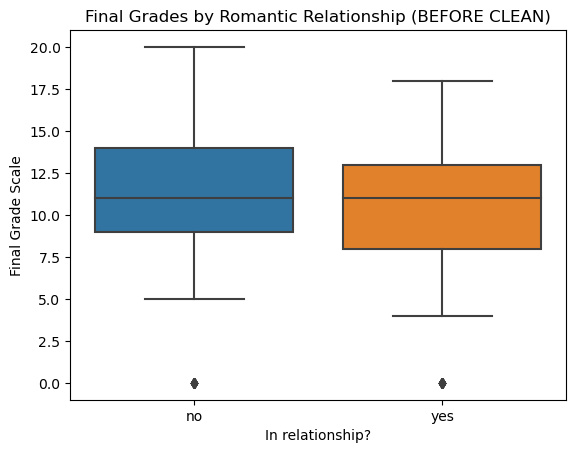

In [4]:
#boxplot for visualy identfying the outliners 
boxplot_m = sns.boxplot(data=df_m, x= 'romantic', y='G3')
plt.xlabel('In relationship?')
plt.ylabel('Final Grade Scale')
plt.title('Final Grades by Romantic Relationship (BEFORE CLEAN)')
print("BEFORE CLEANING Boxplot visualization of Math Class studdetns:", boxplot_m)

BEFORE CLEANING Boxplot visualization of Port Class studdetns: Axes(0.125,0.11;0.775x0.77)


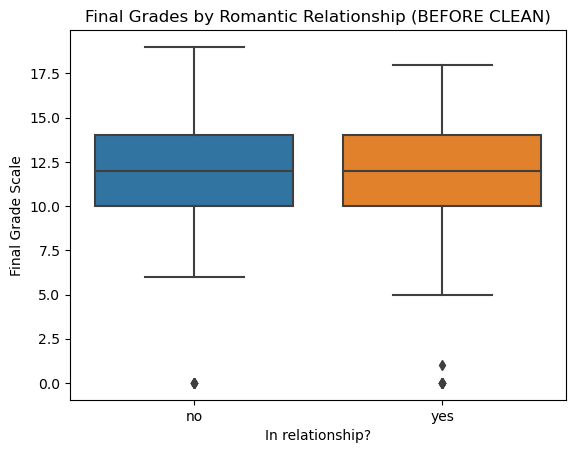

In [5]:
#boxplot for visualy identfying the outliners 
boxplot_p = sns.boxplot(data=df_p, x= 'romantic', y='G3')
plt.xlabel('In relationship?')
plt.ylabel('Final Grade Scale')
plt.title('Final Grades by Romantic Relationship (BEFORE CLEAN)')
print("BEFORE CLEANING Boxplot visualization of Port Class studdetns:", boxplot_p)

In [6]:
#let's define what we mean by outliners in our data, if student have 0 absences but have 0 on the final exam,
#we consider it as outliner. In the table below we can see that some students have grades for G1 and G2 but fail to get the final grade 
new_df_m = df_new = df_m[['G1', 'G2', 'G3', 'absences']]
new_df_m[(new_df_m['absences'] == 0) & (new_df_m['G3'] == 0)]


,G1,G2,G3,absences
128,7,4,0,0
130,12,0,0,0
131,8,0,0,0
134,9,0,0,0
135,11,0,0,0
136,10,0,0,0
137,4,0,0,0
140,7,9,0,0
144,5,0,0,0
146,6,7,0,0


In [7]:
# Number of rows wtih outliners. Outlineres being studetn who werent absent for the class but haven't recived final grade
outliners_m = len(df_m[(df_m['G3'] == 0) & (df_m['absences'] == 0)])
print("Outliners in Math class:", outliners_m) 

outliners_p = len(df_p[(df_p['G3'] == 0) & (df_p['absences'] == 0)])
print("Outliners in Math class:", outliners_p) 

Outliners in Math class: 38
Outliners in Math class: 15


In [8]:
#outliners drop 
df_m = df_m.drop(df_m[(df_m['G3'] == 0) & (df_m['absences'] == 0)].index)
df_p = df_p.drop(df_p[(df_p['G3'] == 0) & (df_p['absences'] == 0)].index)

In [9]:
#shape of our DFs after drop of outliners 
print("Our MAth class have WITHOUT outliners (ROWS, Columns):", df_m.shape)
print(" ")
print("Our Port class have WITHOUT outliners (ROWS, Columns):", df_p.shape)

Our MAth class have WITHOUT outliners (ROWS, Columns): (357, 33)
 
Our Port class have WITHOUT outliners (ROWS, Columns): (634, 33)


AFTER CLEANING Boxplot visualization of Math Class studdetns: Axes(0.125,0.11;0.775x0.77)


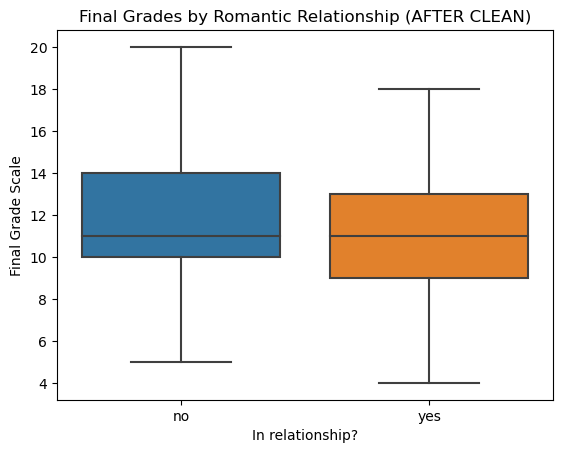

In [10]:
#boxplot for visualy identfying the outliners 
boxplot_m = sns.boxplot(data=df_m, x= 'romantic', y='G3')
plt.xlabel('In relationship?')
plt.ylabel('Final Grade Scale')
plt.title('Final Grades by Romantic Relationship (AFTER CLEAN)')
print("AFTER CLEANING Boxplot visualization of Math Class studdetns:", boxplot_m)

AFTER CLEANING Boxplot visualization of Port Class studdetns: Axes(0.125,0.11;0.775x0.77)


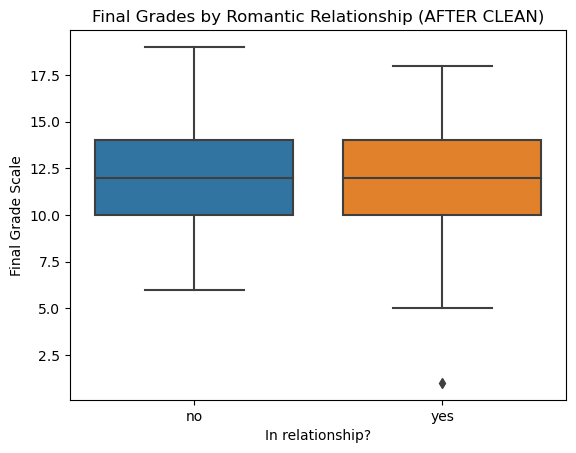

In [11]:
#boxplot for visualy identfying the outliners 
boxplot_p = sns.boxplot(data=df_p, x= 'romantic', y='G3')
plt.xlabel('In relationship?')
plt.ylabel('Final Grade Scale')
plt.title('Final Grades by Romantic Relationship (AFTER CLEAN)')
print("AFTER CLEANING Boxplot visualization of Port Class studdetns:", boxplot_p)

# Transform (Charles)

In [12]:
# Since I am only analyzing parental status and alcohol affecting student performance,
# I can drop all columns except alcohol and parental status as well as the grading periods and failures.

drop_list = ['failures', 'G1', 'G2', 'G3', 'Pstatus', 'Dalc', 'Walc']
df_new_p = df_p.drop(df_p.columns.difference(drop_list), axis = 1)
df_new_p

,Pstatus,failures,Dalc,Walc,G1,G2,G3
0,A,0,1,1,0,11,11
1,T,0,1,1,9,11,11
2,T,0,2,3,12,13,12
3,T,0,1,1,14,14,14
4,T,0,1,2,11,13,13
...,...,...,...,...,...,...,...
644,T,1,1,2,10,11,10
645,T,0,1,1,15,15,16
646,T,0,1,1,11,12,9
647,T,0,3,4,10,10,10


In [13]:
port_bool = pd.get_dummies(df_new_p, drop_first=True)
port_bool

,failures,Dalc,Walc,G1,G2,G3,Pstatus_T
0,0,1,1,0,11,11,False
1,0,1,1,9,11,11,True
2,0,2,3,12,13,12,True
3,0,1,1,14,14,14,True
4,0,1,2,11,13,13,True
...,...,...,...,...,...,...,...
644,1,1,2,10,11,10,True
645,0,1,1,15,15,16,True
646,0,1,1,11,12,9,True
647,0,3,4,10,10,10,True


In [14]:
port_encode = port_bool.astype(int)
port_encode

,failures,Dalc,Walc,G1,G2,G3,Pstatus_T
0,0,1,1,0,11,11,0
1,0,1,1,9,11,11,1
2,0,2,3,12,13,12,1
3,0,1,1,14,14,14,1
4,0,1,2,11,13,13,1
...,...,...,...,...,...,...,...
644,1,1,2,10,11,10,1
645,0,1,1,15,15,16,1
646,0,1,1,11,12,9,1
647,0,3,4,10,10,10,1


In [15]:
# the newly transformed dataset will be saved in this file name

port_encode.to_csv('../data/processed/student-por-cleaned.csv')

OSError: Cannot save file into a non-existent directory: '../data/processed'